<a href="https://colab.research.google.com/github/makepluscode/tinyml-examples/blob/main/tiny01_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [ ]:
# Print versions
!python --versions
print('Numpy' + np.__version__)
print('TensorFlow' + tf.__version__)
print('Keras' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy1.19.5
TensorFlow2.4.1
Keras2.4.0


In [ ]:
nsamples = 1000
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = 'sine_model'
c_model_name = 'sine_model'

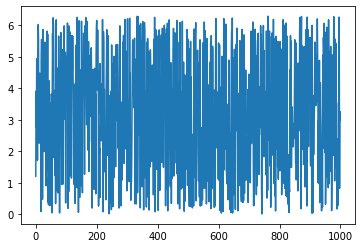

In [ ]:
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

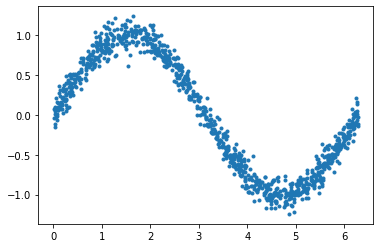

In [ ]:
y_values = np.sin(x_values) + (0.1*np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

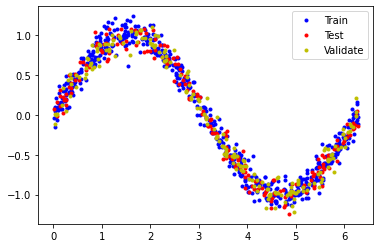

In [ ]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

assert(x_train.size + x_val.size + x_test.size) == nsamples

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 [==============================] - 1s 42ms/step - loss: 0.7679 - mae: 0.7679 - val_loss: 0.7299 - val_mae: 0.7299
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7179 - mae: 0.7179 - val_loss: 0.6777 - val_mae: 0.6777
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6649 - mae: 0.6649 - val_loss: 0.6352 - val_mae: 0.6352
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6358 - mae: 0.6358 - val_loss: 0.6011 - val_mae: 0.6011
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6122 - mae: 0.6122 - val_loss: 0.5751 - val_mae: 0.5751
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.5766 - mae: 0.5766 - val_loss: 0.5542 - val_mae: 0.5542
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.5600 - mae: 0.5600 - val_loss: 0.5365 - val_mae: 0.5365
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 0.5589 - mae: 0.5589 - va

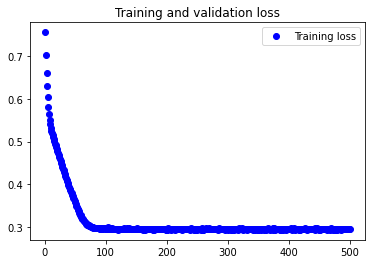

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

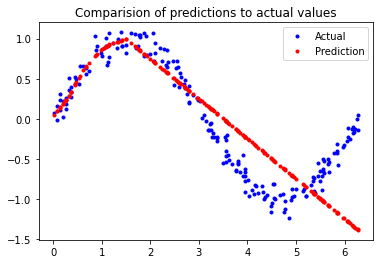

In [17]:
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparision of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label="Prediction")
plt.legend()
plt.show()


In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqpsjwha9/assets


INFO:tensorflow:Assets written to: /tmp/tmpqpsjwha9/assets


2960